# Immigration Nation - Analytics on Undocumented Immigrants
Immigration Nation is a Netflix documentary shinning light on the Immigration and Customs Enforcement (ICE) operation and how it takes a toll on different undocumented immigrants. After watching the documentary, I wanted to look into the numbers and practice further with data visualization (specifically Matplotlib and Seaborn) since I am a beginner.

For more information on the history of ICE and for further analysis questions, go to the following link <a href = "https://docs.google.com/presentation/d/1k5YfxKwkbJxaupkxbGBQVvx_EQZGDDp9tJ9KFR-Au_A/edit?usp=sharing" target = "_blank">here</a>. I created this PowerPoint presentation for my documentary club, which also includes review questions to discuss.

The following tables I found regarding the number of undocumented immigrants apprehended and deported are from the Department of Homeland Security. They are imported from the **2019 Yearbook of Immigration Statistics**:
<blockquote>The 2019 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns.</blockquote>

The tables that will be analyzed:
<ul>
<li><a href = "https://www.dhs.gov/immigration-statistics/yearbook/2019/table33" target = >Table 33</a>. Aliens Apprehended: Fiscal Years 1925 to 2019</li>
<li><a href = "https://www.dhs.gov/immigration-statistics/yearbook/2019/table39" target = >Table 39</a>. Aliens Removed or Returned: Fiscal Years 1892 to 2019</li>
</ul>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
#Table 33 - Aliens Apprehended
df_app = pd.read_csv('immigration_apprehended.csv')
print(df_app)
#Table 39 - Aliens Removed or Returned
df_dep = pd.read_csv('immigration_deported.csv')
print(df_dep)

    Year   Number
0   2019  1013539
1   2018   572566
2   2017   461540
3   2016   530250
4   2015   462388
..   ...      ...
90  1929    32711
91  1928    23566
92  1927    16393
93  1926    12735
94  1925    22199

[95 rows x 2 columns]
     Year  Removals   Returns
0    2019    359885  171445.0
1    2018    337287  109083.0
2    2017    288093  100708.0
3    2016    332227  106464.0
4    2015    325668  129666.0
..    ...       ...       ...
123  1896      3037       NaN
124  1895      2596       NaN
125  1894      1806       NaN
126  1893      1630       NaN
127  1892      2801       NaN

[128 rows x 3 columns]


## Using Matplotlib
The figures shown below are to practice using only Matplotlib to create charts.
### Undocumented Immigrants Apprehended - Line Chart

In [3]:
##Reverse list so the year is in acsending order
year = df_app.Year[::-1].tolist()
#print(year)

##Reverse list so the apprehended number is with the correct year that was originally organized to be in ascending order
num_app = df_app.Number[::-1].tolist()
#print(num_app)

##Set x-ticks for chart
x_tick_year = []
#ceil function rounds up
num_ticks = math.ceil(len(year)/10)
#print(num_ticks)
##Answer: 10
for x in range(num_ticks):
    x_tick_year.append(year[x*10])
#print(x_tick_year)

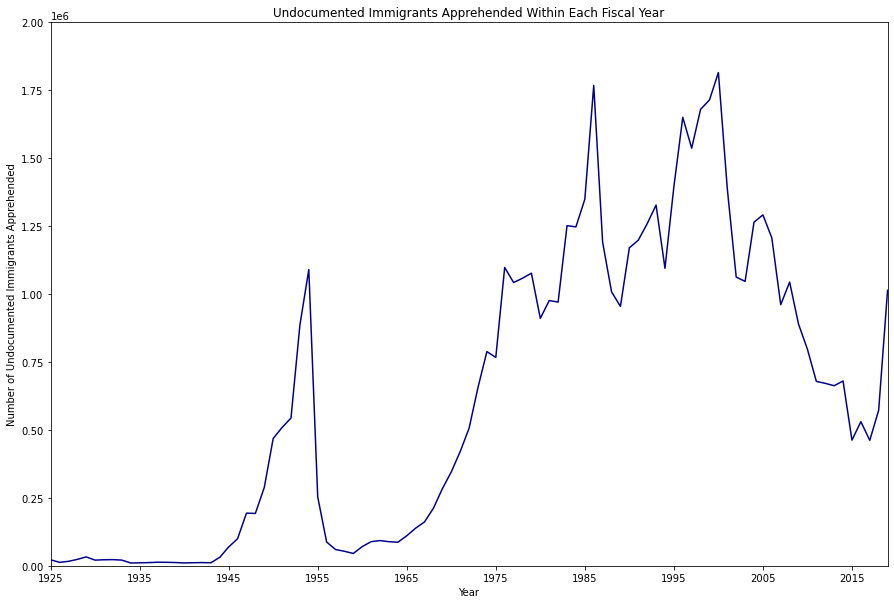

In [4]:
f, ax = plt.subplots(figsize=(15, 10))
ax.plot(year, num_app, color='darkblue')
ax.axis([1925, 2019, 0, 2000000])
ax.set_xticks(x_tick_year)
plt.title('Undocumented Immigrants Apprehended Within Each Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Number of Undocumented Immigrants Apprehended')

plt.show()

#### Notes
1976: Includes the 15 months from July 1, 1975 to September 30, 1976 because the end date of fiscal years was changed from June 30 to September 30.<br>
2008: Beginning in 2008, includes all administrative arrests conducted by ICE ERO.<br>
2009: Beginning in 2009, data include administrative arrests conducted by ICE ERO and administrative arrests conducted under the 287(g) program.<br>
2016: The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; for earlier years only one administrative arrest could be counted for the same person on the same day.
Note: Data refer to Border Patrol apprehensions and ICE administrative arrests. Prior to 1952, data refer to Border Patrol apprehensions.<br>

Source: U.S. Department of Homeland Security

### Undocumented Immigrants Removed or Returned - Stacked Bar Chart

In [5]:
##Reverse list so the year is in acsending order
year2 = df_dep.Year[::-1].tolist()
#print(year2)

##Reverse list so the removals  is with the correct year that was originally organized to be in ascending order
removals = df_dep.Removals[::-1].tolist()
#print(removals)

##Reverse list so the returns is with the correct year that was originally organized to be in ascending order
returns = df_dep.Returns[::-1].tolist()
#print(returns)

##Set x-ticks for chart
x_tick_year2 = []
#ceil function rounds up
num_ticks2 = math.ceil(len(year2)/10)
#print(num_ticks)
##Answer: 10
for x in range(num_ticks2):
    x_tick_year2.append(year2[x*10])
#print(x_tick_year2)

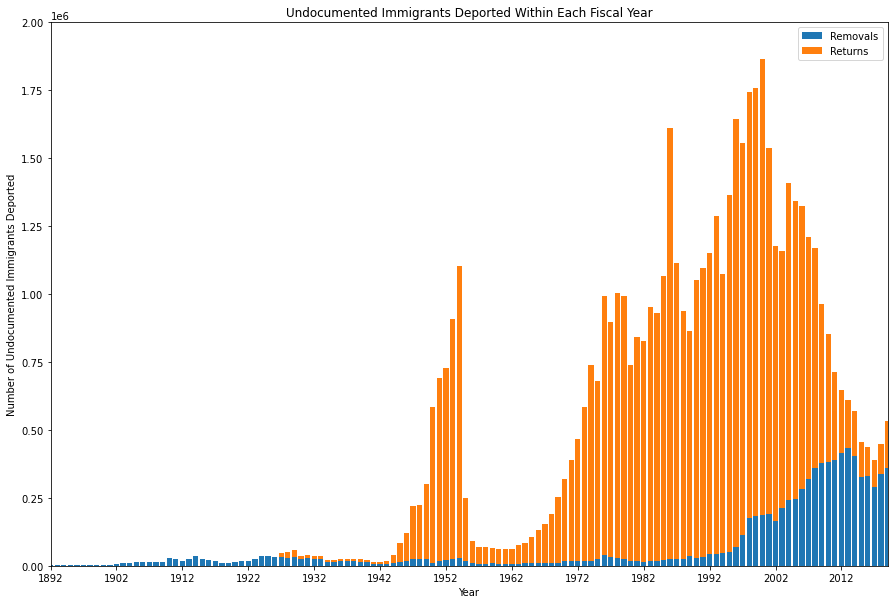

In [6]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
ax2.bar(year2, removals, label='Removals')
ax2.bar(year2, returns, bottom= removals, label='Returns')
ax2.axis([1892, 2019, 0, 2000000])
ax2.set_xticks(x_tick_year2)
ax2.legend()
plt.title('Undocumented Immigrants Deported Within Each Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Number of Undocumented Immigrants Deported')

plt.savefig('immigration_deported.png')

plt.show()

#### Notes
**Removals** are the compulsory and confirmed movement of an inadmissible or deportable alien out of the United States based on an order of removal. An alien who is removed has administrative or criminal consequences placed on subsequent reentry owing to the fact of the removal.<br>
Link: https://www.ice.gov/removal<br>
**Returns** are the confirmed movement of an inadmissible or deportable alien out of the United States not based on an order of removal.<br>
Link: <br>
1976: Includes the 15 months from July 1, 1975 to September 30, 1976 because the end date of fiscal years was changed from June 30 to September 30.<br>
2016: The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; prior to 2016, only one administrative arrest could be counted for the same person on the same day.<br>

Source: U.S. Department of Homeland Security

## Using Seaborn - KDE Plotting
The figures shown below are to practice using Seaborn to create charts.<br>
**KDE Plot**
KDE stands for Kernel Density Estimator. A KDE plot gives us the sense of a *univariate* as a curve. A univariate dataset only has one variable and is also referred to as being *one-dimensional*, as opposed to *bivariate* or *two-dimensional* datasets which have two variables.

Source: Codecademy<br>
### Undocumented Immigrants Apprehended
#### Univariate KDE Plot
In this case, the univariate dataset is the number of apprehended undocumented immigrants.

Matplotlib is building the font cache; this may take a moment.


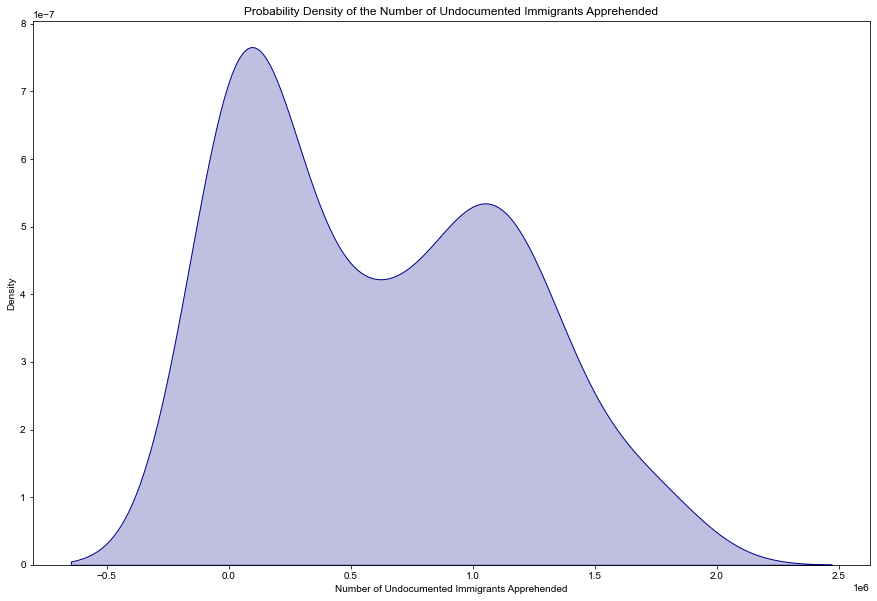

In [7]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
ax3 = sns.kdeplot(num_app, shade=True, color='darkblue')
sns.set_style("darkgrid")
plt.title('Probability Density of the Number of Undocumented Immigrants Apprehended')
plt.xlabel('Number of Undocumented Immigrants Apprehended')
plt.ylabel('Density')

plt.show()

#### Bivariate KDE Plot
In this case, the bivariate dataset is the number of apprehended undocumented immigrants and time.

/Users/elizabethfabio/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


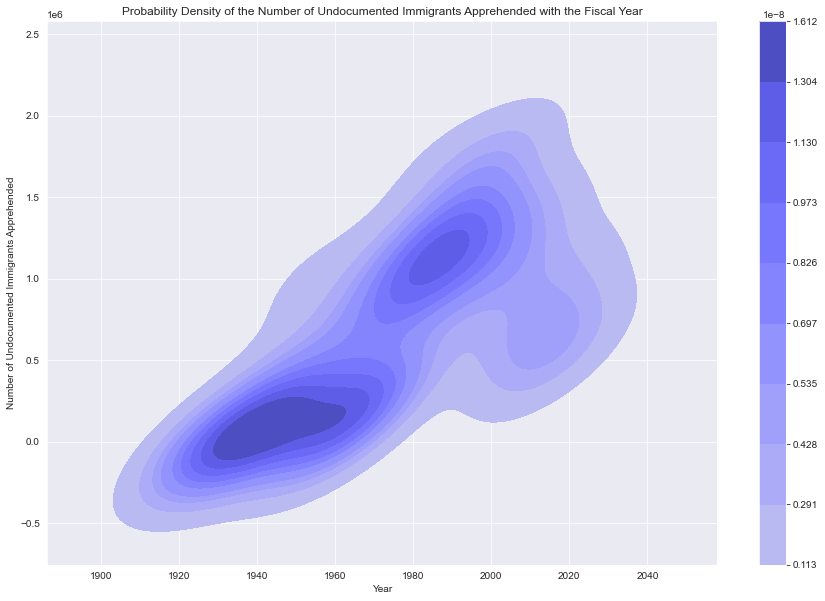

In [8]:
fig4, ax4 = plt.subplots(figsize=(15, 10))
ax4 = sns.kdeplot(year, num_app, shade=True, cbar=True, color='darkblue')
plt.title('Probability Density of the Number of Undocumented Immigrants Apprehended with the Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Number of Undocumented Immigrants Apprehended')

plt.show()

### Undocumented Immigrants Removed or Returned
#### Univariate KDE Plot
In this case, the two plots show the univariate dataset as the number of removed and returned undocumented immigrants.

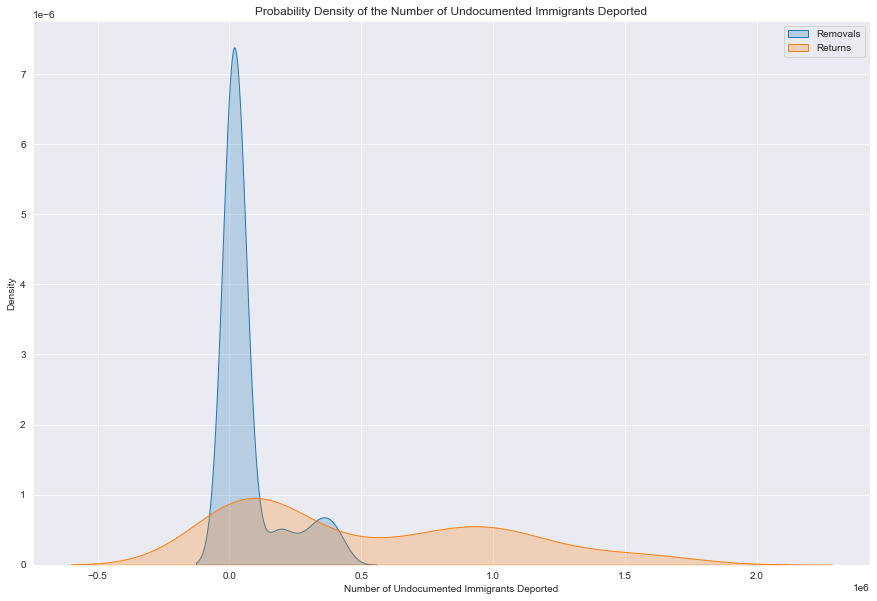

In [9]:
fig5, ax5 = plt.subplots(figsize=(15, 10))
ax5 = sns.kdeplot(removals, shade=True, label='Removals')
ax5 = sns.kdeplot(returns, shade=True, label='Returns')
sns.set_style('darkgrid')
plt.legend()
plt.title('Probability Density of the Number of Undocumented Immigrants Deported')
plt.xlabel('Number of Undocumented Immigrants Deported')
plt.ylabel('Density')

plt.show()

#### Bivariate KDE Plot
In this case, the bivariate dataset is either the number of removed or returned undocumented immigrants and time.

/Users/elizabethfabio/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elizabethfabio/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


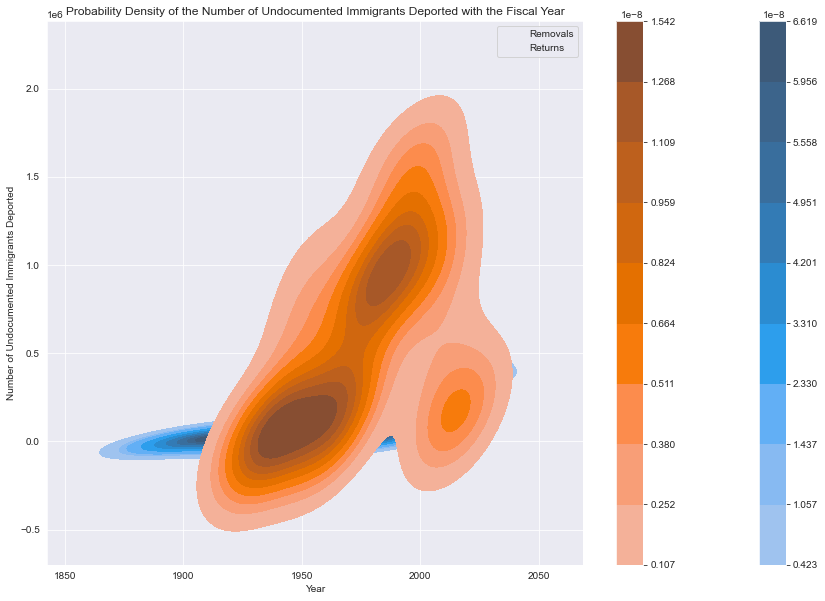

In [10]:
fig6, ax6 = plt.subplots(figsize=(15, 10))
ax6 = sns.kdeplot(year2, removals, cbar=True, shade=True, label='Removals')
ax6 = sns.kdeplot(year2, returns, cbar=True, shade=True, label='Returns')
sns.set_style('darkgrid')
plt.legend()
plt.title('Probability Density of the Number of Undocumented Immigrants Deported with the Fiscal Year')
plt.xlabel('Year')
plt.ylabel('Number of Undocumented Immigrants Deported')

plt.show()

## Conclusion
Creating KDE Plots is not as effective in analyzing the number of undocumented immigrants that were apprehended or deported. Matplotlib, in this case, was the better visualization tool in viewing the trends throughout the years.

For instance, a spike in the early 1950s shown in both tables (the first two tables) for the number of immigrants deported or apprehended reflects the immigration history around that time period. In 1954, the program called Operation Wetback used military-style tactics to remove Mexican immigrants — some of them American citizens — from the United States. Operation Wetback was primarily a response to pressure from a broad coalition of farmers and business interests concerned with the effects of Mexican immigrants living in the United States without legal permission.

Source: Wikipedia (<a href = "https://en.wikipedia.org/wiki/Operation_Wetback" target = "_blank">Operation Wetback</a>)